<img src='https://www.iss.nus.edu.sg/Sitefinity/WebsiteTemplates/ISS/App_Themes/ISS/Images/branding-iss.png' width=15% style="float: right;">
<img src='https://www.iss.nus.edu.sg/Sitefinity/WebsiteTemplates/ISS/App_Themes/ISS/Images/branding-nus.png' width=15% style="float: right;">


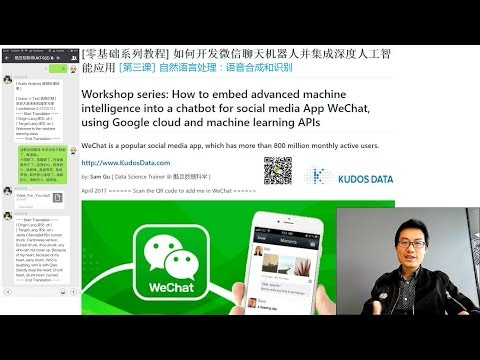

In [1]:
import IPython.display
IPython.display.YouTubeVideo('yZV-XCSmWQY')

# 如何使用和开发微信聊天机器人的系列教程
# A workshop to develop & use an intelligent and interactive chat-bot in WeChat

### WeChat is a popular social media app, which has more than 800 million monthly active users.

<img src='https://www.iss.nus.edu.sg/images/default-source/About-Us/7.6.1-teaching-staff/sam-website.tmb-.png' width=8% style="float: right;">
<img src='reference/WeChat_SamGu_QR.png' width=10% style="float: right;">


by: GU Zhan (Sam)


October 2018 : Update to support Python 3 in local machine, e.g. iss-vm.


April 2017 ======= Scan the QR code to become trainer's friend in WeChat =====>>

### 第三课：自然语言处理：语音识别和合成
### Lesson 3: Natural Language Processing 1

* 语音转换成消息文字 (Speech recognition: voice to text)
* 消息文字转成语音 (Speech synthesis: text to voice)

### Using Google Cloud Platform's Machine Learning APIs

From the same API console, choose "Dashboard" on the left-hand menu and "Enable API".

Enable the following APIs for your project (search for them) if they are not already enabled:
<ol>
**<li> Google Cloud Speech API </li>**
**<li> Google Cloud Text-to-Speech API </li>**
**<li> Google Cloud Translation API [optional] </li>**
</ol>

Finally, because we are calling the APIs from Python (clients in many other languages are available), let's install the Python package (it's not installed by default on Datalab)

In [1]:
# Copyright 2016 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); 
# !pip install --upgrade google-api-python-client

### Before proceeding, ensure to ENABLE this cloud API, e.g. via web console https://console.cloud.google.com 

---

### * 语音转换成消息文字 (Speech recognition: voice to text)

The Speech API can work on streaming data, audio content encoded and embedded directly into the POST message, or on a file on Cloud Storage.

## <span style="color:blue">Install the client library</span> for Speech Recognition: Speech-to-Text

In [3]:
!pip install --upgrade google-cloud-speech

Requirement already up-to-date: google-cloud-speech in /home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages (0.36.0)


### 导入需要用到的一些功能程序库：

In [4]:
# Install library into computer storage:

# Below is for cloud AI GCP Datalab VM only: install audio conversion tool
# retcode = subprocess.call(['apt-get', 'update', '-y'])
# retcode = subprocess.call(['apt-get', 'install', 'libav-tools', '-y'])

In [5]:
# Load library into computer memory:
import io
import os
# Imports the Google Cloud client library
from google.cloud import speech
from google.cloud.speech import enums
from google.cloud.speech import types

### * Speech Recognition: Speech-to-Text

In [6]:
# Speech-to-Text API

# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
# client_speech2text = speech.SpeechClient()

# (2) Instantiates a client - using 'service account json' file
client_speech2text = speech.SpeechClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")


### Utility function to convert mp3 file to target GCP audio file type:

In [7]:
# Flag to indicate the environment to run this program:

# Uncomment to run the code on Google Cloud Platform
# parm_runtime_env_GCP = True

# Uncomment to run the code in local machine
parm_runtime_env_GCP = False

import subprocess

# Utility function to convert mp3 file to target GCP audio file type:
#    audio_type = ['flac', 'wav']
#    audio_file_input = msg['FileName']

# Running Speech API
def didi_mp3_audio_conversion(audio_file_input, audio_type='flac'):
    audio_file_output = str(audio_file_input) + '.' + str(audio_type)
    
    # convert mp3 file to target GCP audio file:

# remove audio_file_output, if exists
    retcode = subprocess.call(['rm', audio_file_output])
    
    if parm_runtime_env_GCP: # using Datalab in Google Cloud Platform
        # GCP: use avconv to convert audio
        retcode = subprocess.call(['avconv', '-i', audio_file_input, '-ac', '1', audio_file_output])
    else: # using an iss-vm Virtual Machine, or local machine
        # VM : use ffmpeg to convert audio
        retcode = subprocess.call(['ffmpeg', '-i', audio_file_input, '-ac', '1', audio_file_output])
    
    if retcode == 0:
        print('[  O K  ] Converted  audio file for API: %s' % audio_file_output)
    else:
        print('[ ERROR ] Function: didi_mp3_audio_conversion() Return Code is : {}'.format(retcode))

    return audio_file_output # return file name string only

---

## <span style="color:blue">Use cloud APIs in native forms</span> for Speech Recognition: Speech-to-Text

### Transcribing Short Audio Files (less than ~1 minute)

This page demonstrates how to transcribe a short audio file to text using synchronous speech recognition.

https://cloud.google.com/speech-to-text/docs/sync-recognize

### Supported Languages  

https://cloud.google.com/speech/docs/languages


'**af-ZA**' 'Afrikaans (South Africa)' '**id-ID**' 'Indonesian (Indonesia)' '**ms-MY**' 'Malay (Malaysia)' '**ca-ES**' 'Catalan (Spain)' '**cs-CZ**' 'Czech (Czech Republic)' '**da-DK**' 'Danish (Denmark)' '**de-DE**' 'German (Germany)' '**en-AU**' 'English (Australia)' '**en-CA**' 'English (Canada)' '**en-GB**' 'English (United Kingdom)' '**en-IN**' 'English (India)' '**en-IE**' 'English (Ireland)' '**en-NZ**' 'English (New Zealand)' '**en-PH**' 'English (Philippines)' '**en-ZA**' 'English (South Africa)' '**en-US**' 'English (United States)' '**es-AR**' 'Spanish (Argentina)' '**es-BO**' 'Spanish (Bolivia)' '**es-CL**' 'Spanish (Chile)' '**es-CO**' 'Spanish (Colombia)' '**es-CR**' 'Spanish (Costa Rica)' '**es-EC**' 'Spanish (Ecuador)' '**es-SV**' 'Spanish (El Salvador)' '**es-ES**' 'Spanish (Spain)' '**es-US**' 'Spanish (United States)' '**es-GT**' 'Spanish (Guatemala)' '**es-HN**' 'Spanish (Honduras)' '**es-MX**' 'Spanish (Mexico)' '**es-NI**' 'Spanish (Nicaragua)' '**es-PA**' 'Spanish (Panama)' '**es-PY**' 'Spanish (Paraguay)' '**es-PE**' 'Spanish (Peru)' '**es-PR**' 'Spanish (Puerto Rico)' '**es-DO**' 'Spanish (Dominican Republic)' '**es-UY**' 'Spanish (Uruguay)' '**es-VE**' 'Spanish (Venezuela)' '**eu-ES**' 'Basque (Spain)' '**fil-PH**' 'Filipino (Philippines)' '**fr-CA**' 'French (Canada)' '**fr-FR**' 'French (France)' '**gl-ES**' 'Galician (Spain)' '**hr-HR**' 'Croatian (Croatia)' '**zu-ZA**' 'Zulu (South Africa)' '**is-IS**' 'Icelandic (Iceland)' '**it-IT**' 'Italian (Italy)' '**lt-LT**' 'Lithuanian (Lithuania)' '**hu-HU**' 'Hungarian (Hungary)' '**nl-NL**' 'Dutch (Netherlands)' '**nb-NO**' 'Norwegian Bokmål (Norway)' '**pl-PL**' 'Polish (Poland)' '**pt-BR**' 'Portuguese (Brazil)' '**pt-PT**' 'Portuguese (Portugal)' '**ro-RO**' 'Romanian (Romania)' '**sk-SK**' 'Slovak (Slovakia)' '**sl-SI**' 'Slovenian (Slovenia)' '**fi-FI**' 'Finnish (Finland)' '**sv-SE**' 'Swedish (Sweden)' '**vi-VN**' 'Vietnamese (Vietnam)' '**tr-TR**' 'Turkish (Turkey)' '**el-GR**' 'Greek (Greece)' '**bg-BG**' 'Bulgarian (Bulgaria)' '**ru-RU**' 'Russian (Russia)' '**sr-RS**' 'Serbian (Serbia)' '**uk-UA**' 'Ukrainian (Ukraine)' '**he-IL**' 'Hebrew (Israel)' '**ar-IL**' 'Arabic (Israel)' '**ar-JO**' 'Arabic (Jordan)' '**ar-AE**' 'Arabic (United Arab Emirates)' '**ar-BH**' 'Arabic (Bahrain)' '**ar-DZ**' 'Arabic (Algeria)' '**ar-SA**' 'Arabic (Saudi Arabia)' '**ar-IQ**' 'Arabic (Iraq)' '**ar-KW**' 'Arabic (Kuwait)' '**ar-MA**' 'Arabic (Morocco)' '**ar-TN**' 'Arabic (Tunisia)' '**ar-OM**' 'Arabic (Oman)' '**ar-PS**' 'Arabic (State of Palestine)' '**ar-QA**' 'Arabic (Qatar)' '**ar-LB**' 'Arabic (Lebanon)' '**ar-EG**' 'Arabic (Egypt)' '**fa-IR**' 'Persian (Iran)' '**hi-IN**' 'Hindi (India)' '**th-TH**' 'Thai (Thailand)' '**ko-KR**' 'Korean (South Korea)' '**cmn-Hant-TW**' 'Chinese, Mandarin (Traditional, Taiwan)' '**yue-Hant-HK**' 'Chinese, Cantonese (Traditional, Hong Kong)' '**ja-JP**' 'Japanese (Japan)' '**cmn-Hans-HK**' 'Chinese, Mandarin (Simplified, Hong Kong)' '**cmn-Hans-CN**' 'Chinese, Mandarin (Simplified, China)' 

### 机器智能API接口控制参数 (Define control parameters for API)

In [8]:
# API control parameter for 语音转换成消息文字 (Speech recognition: voice to text)
parm_speech_recognition_language = 'en-US' # speech API 'voice to text' language
# parm_speech_recognition_language = 'cmn-Hans-CN' # speech API 'voice to text' language


In [9]:
didi_mp3_audio_conversion('reference/S-IPA-welcome.mp3', 'wav')

[  O K  ] Converted  audio file for API: reference/S-IPA-welcome.mp3.wav


'reference/S-IPA-welcome.mp3.wav'

In [10]:
didi_mp3_audio_conversion('reference/S-IPA-welcome.mp3')

[  O K  ] Converted  audio file for API: reference/S-IPA-welcome.mp3.flac


'reference/S-IPA-welcome.mp3.flac'

In [11]:
didi_mp3_audio_conversion('reference/S-IPA-welcome.m4a')

[  O K  ] Converted  audio file for API: reference/S-IPA-welcome.m4a.flac


'reference/S-IPA-welcome.m4a.flac'

### Define function to invoke API

In [12]:
def didi_speech2text(speech_file, didi_language_code='en-US'):
    """Transcribe the given audio file."""
    from google.cloud import speech
    from google.cloud.speech import enums
    from google.cloud.speech import types
    
##################################################################
#     client_speech2text = speech.SpeechClient()
# 
#     client_speech2text = speech.SpeechClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    with io.open(speech_file, 'rb') as audio_file:
        content = audio_file.read()

    audio = types.RecognitionAudio(content=content)
#    print('audio : ', audio)
    config = types.RecognitionConfig(
#         encoding=enums.RecognitionConfig.AudioEncoding.FLAC,
#         encoding=enums.RecognitionConfig.AudioEncoding.LINEAR16,
#         sample_rate_hertz=16000,
        language_code=didi_language_code)

    response = client_speech2text.recognize(config, audio)
    print('response : ', response)
    # Each result is for a consecutive portion of the audio. Iterate through
    # them to get the transcripts for the entire audio file.
    for result in response.results:
        # The first alternative is the most likely one for this portion.
        print(u'Transcript : {}'.format(result.alternatives[0].transcript))
        print(u'Confidence : {0:.3f}'.format(result.alternatives[0].confidence))
    
    return response

In [13]:
response = didi_speech2text(didi_mp3_audio_conversion('reference/S-IPA-welcome.mp3'), parm_speech_recognition_language)

[  O K  ] Converted  audio file for API: reference/S-IPA-welcome.mp3.flac
response :  results {
  alternatives {
    transcript: "hi everyone welcome to intelligent process automation course"
    confidence: 0.9285960793495178
  }
}

Transcript : hi everyone welcome to intelligent process automation course
Confidence : 0.929


In [14]:
response = didi_speech2text(didi_mp3_audio_conversion('reference/S-IPA-welcome.mp3', 'wav'), parm_speech_recognition_language)

[  O K  ] Converted  audio file for API: reference/S-IPA-welcome.mp3.wav
response :  results {
  alternatives {
    transcript: "hi everyone welcome to intelligent process automation course"
    confidence: 0.9263386130332947
  }
}

Transcript : hi everyone welcome to intelligent process automation course
Confidence : 0.926


In [15]:
response = didi_speech2text(didi_mp3_audio_conversion('reference/S-IPA-welcome.m4a'), parm_speech_recognition_language)

[  O K  ] Converted  audio file for API: reference/S-IPA-welcome.m4a.flac
response :  results {
  alternatives {
    transcript: "hi everyone welcome to intelligent process automation course"
    confidence: 0.9234797954559326
  }
}

Transcript : hi everyone welcome to intelligent process automation course
Confidence : 0.923


### pasre 'response' structure

In [16]:
response.results

[alternatives {
  transcript: "hi everyone welcome to intelligent process automation course"
  confidence: 0.9234797954559326
}
]

In [17]:
response.results[0]

alternatives {
  transcript: "hi everyone welcome to intelligent process automation course"
  confidence: 0.9234797954559326
}

In [18]:
response.results[0].alternatives

[transcript: "hi everyone welcome to intelligent process automation course"
confidence: 0.9234797954559326
]

In [19]:
response.results[0].alternatives[0]

transcript: "hi everyone welcome to intelligent process automation course"
confidence: 0.9234797954559326

In [20]:
response.results[0].alternatives[0].transcript

'hi everyone welcome to intelligent process automation course'

In [21]:
response.results[0].alternatives[0].confidence

0.9234797954559326

---

### Exercise / Workshop Enhancement:
### Transcribing Long Audio Files (longer than 1 minute)

This page demonstrates how to transcribe long audio files (longer than 1 minute) to text using asynchronous speech recognition.

https://cloud.google.com/speech-to-text/docs/async-recognize

---

### * 消息文字转成语音 (Speech synthesis: text to voice)

## <span style="color:blue">Install the client library</span> for Speech Synthesis: Text-to-Speech

In [22]:
!pip install --upgrade google-cloud-texttospeech

Requirement already up-to-date: google-cloud-texttospeech in /home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages (0.2.0)


### 导入需要用到的一些功能程序库： Cloud AI API Text-to-Speech

In [23]:
# Load library into computer memory:
import io
import os

# Imports the Google Cloud client library
from google.cloud import texttospeech

### * Speech Synthesis: Text-to-Speech

In [24]:
# 2018 Oct
# Cuttently Google Text-to-Speech API texttospeech.TextToSpeechClient can only use GOOGLE_APPLICATION_CREDENTIALS
!echo $GOOGLE_APPLICATION_CREDENTIALS

/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json


In [25]:
# Text-to-Speech API

# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
client_text2speech = texttospeech.TextToSpeechClient()

# (2) Instantiates a client - using 'service account json' file
# client_text2speech = texttospeech.TextToSpeechClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")


---

## <span style="color:blue">Use cloud APIs in native forms</span> for Speech Synthesis: Text-to-Speech

### Supported Languages / Voices

https://cloud.google.com/text-to-speech/docs/voices


Dutch (Netherlands), English (Australia), English (UK), English (US), French, French (Canada), German, Italian, Japanese, Korean, Portugese (Brazil), Spanish, Swedish, Turkish


In [26]:
def didi_text2speech(input_text="Hello, World!", output_mp3_file_name='text2speech.mp3', didi_language_code='en-US'):

    """Synthesizes speech from the input string of text or ssml.

    Note: ssml must be well-formed according to:
        https://www.w3.org/TR/speech-synthesis/
    """

    # Set the text input to be synthesized
    synthesis_input = texttospeech.types.SynthesisInput(text=input_text)

    # Build the voice request, select the language code ("en-US") and the ssml
    # voice gender ("neutral")
    voice = texttospeech.types.VoiceSelectionParams(
        language_code=didi_language_code,
        ssml_gender=texttospeech.enums.SsmlVoiceGender.NEUTRAL)

    # Select the type of audio file you want returned
    audio_config = texttospeech.types.AudioConfig(
        audio_encoding=texttospeech.enums.AudioEncoding.MP3)

    # Perform the text-to-speech request on the text input with the selected
    # voice parameters and audio file type
    response = client_text2speech.synthesize_speech(synthesis_input, voice, audio_config)

    # The response's audio_content is binary.
    with open(output_mp3_file_name, 'wb') as out:
        # Write the response to the output file.
        out.write(response.audio_content)
        print('Audio content written to mp3 file : {}'.format(output_mp3_file_name))
        
    return output_mp3_file_name

### 机器智能API接口控制参数 (Define control parameters for API)

In [27]:
# API control parameter for 消息文字转成语音 (Speech synthesis: text to voice)
parm_speech_synthesis_language = 'en-US' # speech synthesis API 'text to voice' language
# parm_speech_synthesis_language = 'es-ES' # speech synthesis API 'text to voice' language


In [28]:
input_text='Hi everyone! It\'s great to meet you in intelligent process automation course!'
didi_text2speech(input_text, 'reference/text2speech_IPA.mp3', parm_speech_synthesis_language)

Audio content written to mp3 file : reference/text2speech_IPA.mp3


'reference/text2speech_IPA.mp3'

---

## <span style="color:blue">Use local AI module in native forms</span> for Speech Synthesis: Text-to-Speech

### 导入需要用到的一些功能程序库： Local AI Module Text-to-Speech

In [29]:
# Local AI Module for Speech Synthesis: Text-to-Speech

# Install library into computer storage:

# Below is an optional local AI module for "text to speech" 
# import subprocess
# retcode = subprocess.call(['pip', 'install', '-U', 'gTTS'])
!pip install -U gTTS

# Load library into computer memory:

# Below is for Google Speech synthesis: text to voice API
from gtts import gTTS

Requirement already up-to-date: gTTS in /home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages (2.0.1)


### Supported Languages / Voices

https://pypi.python.org/pypi/gTTS


The easiest way to get a list of available language is to print them with: ***gtts-cli --all***

***iss-user@iss-vm:~$ gtts-cli --all***

**af**: Afrikaans **ar**: Arabic **bn**: Bengali **bs**: Bosnian **ca**: Catalan **cs**: Czech **cy**: Welsh **da**: Danish **de**: German **el**: Greek **en-au**: English (Australia) **en-ca**: English (Canada) **en-gb**: English (UK) **en-gh**: English (Ghana) **en-ie**: English (Ireland) **en-in**: English (India) **en-ng**: English (Nigeria) **en-nz**: English (New Zealand) **en-ph**: English (Philippines) **en-tz**: English (Tanzania) **en-uk**: English (UK) **en-us**: English (US) **en-za**: English (South Africa) **en**: English **eo**: Esperanto **es-es**: Spanish (Spain) **es-us**: Spanish (United States) **es**: Spanish **et**: Estonian **fi**: Finnish **fr-ca**: French (Canada) **fr-fr**: French (France) **fr**: French **hi**: Hindi **hr**: Croatian **hu**: Hungarian **hy**: Armenian **id**: Indonesian **is**: Icelandic **it**: Italian **ja**: Japanese **jw**: Javanese **km**: Khmer **ko**: Korean **la**: Latin **lv**: Latvian **mk**: Macedonian **ml**: Malayalam **mr**: Marathi **my**: Myanmar (Burmese) **ne**: Nepali **nl**: Dutch **no**: Norwegian **pl**: Polish **pt-br**: Portuguese (Brazil) **pt-pt**: Portuguese (Portugal) **pt**: Portuguese **ro**: Romanian **ru**: Russian **si**: Sinhala **sk**: Slovak **sq**: Albanian **sr**: Serbian **su**: Sundanese **sv**: Swedish **sw**: Swahili **ta**: Tamil **te**: Telugu **th**: Thai **tl**: Filipino **tr**: Turkish **uk**: Ukrainian **vi**: Vietnamese **zh-cn**: Chinese (Mandarin/China) **zh-tw**: Chinese (Mandarin/Taiwan)


In [30]:
# API control parameter for 消息文字转成语音 (Speech synthesis: text to voice)
parm_speech_synthesis_language_local = 'en' # speech synthesis API 'text to voice' language

In [31]:
import sys
# Running Local AI Module Text-to-Speech
def didi_text2speech_local(input_text="Hello, World!", output_mp3_file_name='text2speech_local.mp3', didi_language_code='en'):
    # Python 2
    if sys.version_info[0] < 3: 
        tts = gTTS(text=input_text.encode('utf-8'), lang=didi_language_code, slow=False)
    # Python 3
    else:
        tts = gTTS(text=input_text, lang=didi_language_code, slow=False)

    tts.save(output_mp3_file_name)
    print('\nCompeleted: Speech synthesis API ( Text -> Voice)')
    print(input_text)
    return output_mp3_file_name

In [32]:
input_text='Hi everyone! It\'s great to meet you in intelligent process automation course!'
didi_text2speech_local(input_text, 'reference/text2speech_IPA_local.mp3', parm_speech_synthesis_language_local)


Compeleted: Speech synthesis API ( Text -> Voice)
Hi everyone! It's great to meet you in intelligent process automation course!


'reference/text2speech_IPA_local.mp3'

In [33]:
# API control parameter for 消息文字转成语音 (Speech synthesis: text to voice)
parm_speech_synthesis_language_local = 'zh-cn' # speech synthesis API 'text to voice' language

In [34]:
input_text="明月几时有？把酒问青天。不知天上宫阙，今夕是何年？我欲乘风归去，又恐琼楼玉宇，高处不胜寒。起舞弄清影，何似在人间？转朱阁，低绮户，照无眠。不应有恨，何事长向别时圆？人有悲欢离合，月有阴晴圆缺，此事古难全。但愿人长久，千里共婵娟。"
didi_text2speech_local(input_text, 'reference/text2speech_local_zh.mp3', parm_speech_synthesis_language_local)


Compeleted: Speech synthesis API ( Text -> Voice)
明月几时有？把酒问青天。不知天上宫阙，今夕是何年？我欲乘风归去，又恐琼楼玉宇，高处不胜寒。起舞弄清影，何似在人间？转朱阁，低绮户，照无眠。不应有恨，何事长向别时圆？人有悲欢离合，月有阴晴圆缺，此事古难全。但愿人长久，千里共婵娟。


'reference/text2speech_local_zh.mp3'

## <span style="color:blue">Wrap cloud APIs into Functions() for conversational virtual assistant (VA):</span>

### * 语音转换成消息文字 (Speech recognition: voice to text)
### Reuse: Cloud AI API Text-to-Speech; Return converted str(text) from audio.
* response = **didi_speech2text**(didi_mp3_audio_conversion('reference/S-IPA-welcome.mp3'), parm_speech_recognition_language)
* response = str(response)

### * 消息文字转成语音 (Speech synthesis: text to voice)

### Reuse: Cloud AI API Text-to-Speech; Return converted mp3 file name.
* input_text='Hi everyone! It\'s great to meet you in intelligent process automation course!'
* **didi_text2speech**(input_text, 'reference/text2speech_IPA.mp3', parm_speech_synthesis_language)

### Reuse: Local AI Module Text-to-Speech; Return converted mp3 file name.
* input_text='Hi everyone! It\'s great to meet you in intelligent process automation course!'
* **didi_text2speech_local**(input_text, 'reference/text2speech_IPA_local.mp3', parm_speech_synthesis_language_local)

### 机器智能API接口控制参数 (Define control parameters for API)

In [35]:
# API control parameter for 语音转换成消息文字 (Speech recognition: voice to text)
parm_speech_recognition_language = 'en-US' # speech API 'voice to text' language
# parm_speech_recognition_language = 'cmn-Hans-CN' # speech API 'voice to text' language


# API control parameter for 消息文字转成语音 (Speech synthesis: text to voice)
###########     Cloud AI API     ###########
parm_speech_synthesis_language = 'en-US' # speech synthesis API 'text to voice' language
# parm_speech_synthesis_language = 'es-ES' # speech synthesis API 'text to voice' language

########### Local AI Module gTTS ###########
parm_speech_synthesis_language_local = 'en' # speech synthesis API 'text to voice' language
# parm_speech_synthesis_language_local = 'zh-cn' # speech synthesis API 'text to voice' language


## <span style="color:blue">Start interactive conversational virtual assistant (VA):</span>

### Import ItChat, etc. 导入需要用到的一些功能程序库：

In [36]:
import re
import itchat
from itchat.content import *

### Log in using QR code image / 用微信App扫QR码图片来自动登录

In [40]:
# itchat.auto_login(hotReload=True) # hotReload=True: 退出程序后暂存登陆状态。即使程序关闭，一定时间内重新开启也可以不用重新扫码。
itchat.auto_login(enableCmdQR=-2) # enableCmdQR=-2: 命令行显示QR图片

Getting uuid of QR code.


                                                                              
  ██████████████    ██  ██  ████          ██      ██  ██      ██████████████  
  ██          ██    ██    ██  ██        ████████    ██        ██          ██  
  ██  ██████  ██  ██████    ██  ████  ██████        ██  ████  ██  ██████  ██  
  ██  ██████  ██  ██  ████      ██  ██      ████    ████████  ██  ██████  ██  
  ██  ██████  ██    ██  ████      ██  ████  ██████  ████      ██  ██████  ██  
  ██          ██      ██  ████  ██  ██  ██████  ██    ██      ██          ██  
  ██████████████  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██████████████  
                    ██  ██  ██  ████    ████      ████  ████                  
        ████  ████  ████    ████  ██    ██  ██  ██                  ████      
      ████████  ████          ██          ████    ████  ████      ████  ██    
    ██    ██████  ██████████  ████  ██      ████    ██  ████████  ██████  ██  
    ██  ██  ██  ██    ████  ██  ██  ██  ██  ██  ██  

Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 白黑


In [41]:
# Obtain my own Nick Name
MySelf = itchat.search_friends()
NickName4RegEx = '@' + MySelf['NickName'] + '\s*'

In [43]:
# 1. 语音转换成消息文字 (Speech recognition: voice to text)

@itchat.msg_register([RECORDING], isGroupChat=True)
@itchat.msg_register([RECORDING])
def download_files(msg):
    msg.download(msg.fileName)
    print('\nDownloaded audio file name is: %s' % msg['FileName'])
    
    ##############################################################################################################
    #                                          call audio analysis APIs                                          #
    ##############################################################################################################
    
    audio_analysis_reply = u'[ Audio Analysis 音频处理结果 ]\n'

    # Voice to Text:
    audio_analysis_reply += u'\n[ Voice -> Text 语音识别 ]\n'
#     response = KudosData_voice_to_text(msg['FileName'], 'flac')
    response = didi_speech2text(didi_mp3_audio_conversion(msg['FileName']), parm_speech_recognition_language)
    
    audio_analysis_reply += str(response) + u'\n'
            
    return audio_analysis_reply

In [44]:
# 2.1 消息文字转成语音 (Speech synthesis: text to voice) 
###########     Cloud AI API     ###########

# 在群里，如果收到 @ 自己的文字信息，会自动将文字转换成语音，再以 mp3 文件方式发送回复：
@itchat.msg_register(TEXT, isGroupChat=True)
def text_to_voice_reply_1(msg):
    if msg['isAt']:
        # Remove my own Nick Name from message:
        text2voice = re.sub(NickName4RegEx, '', msg['Content'])
        text2voiceMP3name = KudosData_text_to_voice(text2voice)
        text2voiceMP3name = didi_text2speech(text2voice, 'va_t2s.mp3', parm_speech_synthesis_language)
        itchat.send('@%s@%s' % ('fil', text2voiceMP3name), msg['FromUserName'])

In [45]:
# 2.2 消息文字转成语音 (Speech synthesis: text to voice)
########### Local AI Module gTTS ###########

# 在群里，如果收到 @ 自己的文字信息，会自动将文字转换成语音，再以 mp3 文件方式发送回复：
@itchat.msg_register(TEXT, isGroupChat=False)
def text_to_voice_reply_2(msg):
    # Remove my own Nick Name from message:
    text2voice = re.sub(NickName4RegEx, '', msg['Content'])
    text2voiceMP3name = didi_text2speech_local(text2voice, 'va_t2s_local.mp3', parm_speech_synthesis_language_local)
    itchat.send('@%s@%s' % ('fil', text2voiceMP3name), msg['FromUserName'])

In [46]:
itchat.run()

Start auto replying.



Compeleted: Speech synthesis API ( Text -> Voice)
Hi good evening. How do you do?

Downloaded audio file name is: 181026-190512.mp3
[  O K  ] Converted  audio file for API: 181026-190512.mp3.flac
response :  

Downloaded audio file name is: 181026-191115.mp3
[  O K  ] Converted  audio file for API: 181026-191115.mp3.flac
response :  results {
  alternatives {
    transcript: "Hey, good morning. How you doing?"
    confidence: 0.6546617746353149
  }
}

Transcript : Hey, good morning. How you doing?
Confidence : 0.655

Downloaded audio file name is: 181026-191159.mp3
[  O K  ] Converted  audio file for API: 181026-191159.mp3.flac
response :  results {
  alternatives {
    transcript: "Hey, I\'m sorry."
    confidence: 0.6131309866905212
  }
}

Transcript : Hey, I'm sorry.
Confidence : 0.613

Downloaded audio file name is: 181026-191243.mp3
[  O K  ] Converted  audio file for API: 181026-191243.mp3.flac
response :  

Downloaded audio file name is: 181026-191256.mp3
[  O K  ] Converted  a

Bye~


In [47]:
# interupt kernel, then logout
itchat.logout() # 安全退出

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

### 恭喜您！已经完成了：
### 第三课：自然语言处理：语音识别和合成
### Lesson 3: Natural Language Processing 1
* 消息文字转成语音 (Speech synthesis: text to voice)
* 语音转换成消息文字 (Speech recognition: voice to text)

### 下一课是:
### 第四课：自然语言处理：语义和情感分析
### Lesson 4: Natural Language Processing 2

* 整篇消息文字的情感分析 (Analyzing Sentiment: perform sentiment analysis)
* 消息文字中语句的情感分析 (Analyzing Entity Sentiment: perform entity sentiment analysis)
* 消息文字中名称实体的识别 (Analyzing Entities: perform entity analysis)
* 语句的语法分析 (Analyzing Syntax: syntactic analysis)
* 消息文字的主题分类 (Classifying Content: analyze content to determine the content category)

<img src='reference/WeChat_SamGu_QR.png' width=80% style="float: left;">


---